# Sentiment Analysis of Financial News Headlines
## Classify a news headline containing financial information into either one of the sentiments (Positive, Negative or Neutral)

### Dataset:
https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

### Steps
- 1. Download the dataset
- 2. Load the dataset
- 3. Explore the dataset (Exploratory Data Analysis)
- 4. Clean the data
- 5. Apply SMOTE for imbalanced data [Optional]
- 6. Build a BoW model
- 7. Build a Tf-Idf model
- 8. Split train and test data
- 9. Use one ML Classifying algorithm to classify the finanical news headline data
- 10. Use another ML classifying algorithm to classify them
- 11. Plot Confusion matrix 

In [139]:
import pandas as pd
import numpy as np
import re
import nltk
import itertools
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt

## 1. Download the dataset [1 point]

In [2]:
url = "https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv"

## 2. Load the dataset [1 point]

In [3]:
df = pd.read_csv(url, 
                 encoding='iso-8859-1', 
                 delimiter=',',
                 header=None
                )

In [4]:
df.columns =['Sentiment', 'News']
df

,Sentiment,News
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


## 3. Explore the dataset

In [5]:
df.shape

(4846, 2)

In [6]:
df.info()
# We have a balanced dataset!!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  4846 non-null   object
 1   News       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [215]:
df.isnull().sum()

Sentiment    0
News         0
dtype: int64

In [216]:
pd.set_option('max_colwidth', 500)
df.head(10)

,Sentiment,News
0,neutral,according to gran the company has no plans to move all production to russia although that is where the company is growing
1,neutral,technopolis plans to develop in stages an area of no less than 100 000 square meters in order to host companies working in computer technologies and telecommunications the statement said
2,negative,the international electronic industry company elcoteq has laid off tens of employees from its tallinn facility contrary to earlier layoffs the company contracted the ranks of its office workers the daily postimees reported
3,positive,with the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability
4,positive,according to the company s updated strategy for the years 2009 2012 basware targets a long term net sales growth in the range of 20 40 with an operating profit margin of 10 20 of net sales
5,positive,financing of aspocomp s growth aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding hdi printed circuit boards pcbs
6,positive,for the last quarter of 2010 componenta s net sales doubled to eur131m from eur76m for the same period a year earlier while it moved to a zero pre tax profit from a pre tax loss of eur7m
7,positive,in the third quarter of 2010 net sales increased by 5 2 to eur 205 5 mn and operating profit by 34 9 to eur 23 5 mn
8,positive,operating profit rose to eur 13 1 mn from eur 8 7 mn in the corresponding period in 2007 representing 7 7 of net sales
9,positive,operating profit totalled eur 21 1 mn up from eur 18 6 mn in 2007 representing 9 7 of net sales


## 4. Clean the data

In [217]:
def clean_data(val):
    val = val.lower()             # convert to lowercase
    val = re.sub(r'\W',' ', val)  # eliminates punctuation characters
    val = re.sub(r'\s+',' ',val)  # eliminates extra spaces
    return val

In [218]:
for (columnName, _) in df.iteritems():
    df[columnName] = df[columnName].apply(clean_data)

In [219]:
df

,Sentiment,News
0,neutral,according to gran the company has no plans to move all production to russia although that is where the company is growing
1,neutral,technopolis plans to develop in stages an area of no less than 100 000 square meters in order to host companies working in computer technologies and telecommunications the statement said
2,negative,the international electronic industry company elcoteq has laid off tens of employees from its tallinn facility contrary to earlier layoffs the company contracted the ranks of its office workers the daily postimees reported
3,positive,with the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability
4,positive,according to the company s updated strategy for the years 2009 2012 basware targets a long term net sales growth in the range of 20 40 with an operating profit margin of 10 20 of net sales
...,...,...
4841,negative,london marketwatch share prices ended lower in london monday as a rebound in bank stocks failed to offset broader weakness for the ftse 100
4842,neutral,rinkuskiai s beer sales fell by 6 5 per cent to 4 16 million litres while kauno alus beer sales jumped by 6 9 per cent to 2 48 million litres
4843,negative,operating profit fell to eur 35 4 mn from eur 68 8 mn in 2007 including vessel sales gain of eur 12 3 mn
4844,negative,net sales of the paper segment decreased to eur 221 6 mn in the second quarter of 2009 from eur 241 1 mn in the second quarter of 2008 while operating profit excluding non recurring items rose to eur 8 0 mn from eur 7 6 mn


In [220]:
X = df['News']
y = df['Sentiment']

## 5. SMOTE (Imbalanced dataset) [OPTIONAL] 
Hint: Use **imblearn** library

In [221]:
df.info()
# We have a balanced dataset!!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  4846 non-null   object
 1   News       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


## 6. BoW model [15 points]

### Create a dictionary of word frequency

In [222]:
# wordfreq = {}
# for sentence in corpus:
#     tokens = nltk.word_tokenize(sentence)
#     for token in tokens:
#         if token not in wordfreq.keys():
#             wordfreq[token] = 1
#         else:
#             wordfreq[token] += 1

In [223]:
wordfreq = {}
for sentence in df['News']:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1
wordfreq 

{'according': 123,
 'to': 2523,
 'gran': 2,
 'the': 6069,
 'company': 851,
 'has': 578,
 'no': 53,
 'plans': 39,
 'move': 22,
 'all': 98,
 'production': 132,
 'russia': 86,
 'although': 3,
 'that': 434,
 'is': 930,
 'where': 32,
 'growing': 19,
 'technopolis': 17,
 'develop': 16,
 'in': 2984,
 'stages': 6,
 'an': 326,
 'area': 67,
 'of': 3215,
 'less': 12,
 'than': 118,
 '100': 45,
 '000': 222,
 'square': 25,
 'meters': 6,
 'order': 97,
 'host': 2,
 'companies': 121,
 'working': 19,
 'computer': 11,
 'technologies': 25,
 'and': 2596,
 'telecommunications': 19,
 'statement': 15,
 'said': 545,
 'international': 45,
 'electronic': 22,
 'industry': 89,
 'elcoteq': 39,
 'laid': 10,
 'off': 46,
 'tens': 2,
 'employees': 77,
 'from': 769,
 'its': 646,
 'tallinn': 14,
 'facility': 47,
 'contrary': 1,
 'earlier': 87,
 'layoffs': 8,
 'contracted': 4,
 'ranks': 1,
 'office': 50,
 'workers': 14,
 'daily': 16,
 'postimees': 1,
 'reported': 53,
 'with': 573,
 'new': 277,
 'plant': 118,
 'would': 92,

### Remove the least frequent words using heapq library

In [224]:
# Filter the top 200 words
import heapq

most_freq = heapq.nlargest(200, wordfreq, key=wordfreq.get)
most_freq

['the',
 'of',
 'in',
 'and',
 'to',
 'a',
 'for',
 's',
 'eur',
 'is',
 'company',
 'will',
 'from',
 'on',
 'its',
 'has',
 'with',
 'by',
 'said',
 'as',
 'be',
 'finnish',
 'mn',
 '1',
 'at',
 'it',
 'sales',
 'million',
 'that',
 'net',
 'profit',
 'year',
 'm',
 'was',
 'finland',
 '2',
 '5',
 '3',
 'an',
 'group',
 '2009',
 'operating',
 '2008',
 '4',
 'mln',
 '0',
 'are',
 'new',
 'business',
 'period',
 'quarter',
 '2007',
 '2010',
 '6',
 'oyj',
 'share',
 '7',
 '8',
 'market',
 '9',
 'also',
 'services',
 '000',
 'which',
 'have',
 'shares',
 'first',
 'this',
 'up',
 '2006',
 'helsinki',
 'been',
 'euro',
 'loss',
 'about',
 'compared',
 'today',
 'operations',
 'contract',
 'nokia',
 'mobile',
 '10',
 'total',
 'per',
 'financial',
 'based',
 'production',
 'products',
 'corporation',
 'percent',
 'bank',
 'we',
 'according',
 'were',
 'companies',
 'technology',
 'hel',
 'corresponding',
 'than',
 'plant',
 'other',
 'service',
 'solutions',
 'our',
 'construction',
 'one'

### Step 3: Create Bag of Words Model

In [225]:
sentence_vectors = []
for sentence in df['News']:
    sentence_tokens = nltk.word_tokenize(sentence)
    sent_vec = []
    for token in most_freq:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)


In [226]:
sentence_vectors

[[1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],

### Convert it to numpy array

In [227]:
sentence_vectors = np.asarray(sentence_vectors)

In [228]:
sentence_vectors

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [229]:
X_BoW = pd.DataFrame(sentence_vectors, columns=most_freq)
X_BoW

,the,of,in,and,to,a,for,s,eur,is,...,news,system,people,growth,line,now,billion,acquisition,ltd,report
0,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4841,1,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4842,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4843,0,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4844,1,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [230]:

Xtrain_BoW, Xtest_BoW, ytrain_BoW, ytest_BoW = train_test_split(X_BoW, y, test_size=0.2, random_state=49)

Xtrain_BoW.shape, Xtest_BoW.shape, ytrain_BoW.shape, ytest_BoW.shape
# Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=49)

((3876, 200), (970, 200), (3876,), (970,))

In [231]:
Xtrain_BoW,

(      the  of  in  and  to  a  for  s  eur  is  ...  news  system  people  \
 3828    1   0   0    1   0  0    1  0    0   0  ...     0       0       0   
 3919    1   0   1    1   1  0    0  0    0   1  ...     0       0       0   
 2361    1   1   0    0   0  1    0  0    0   0  ...     0       0       0   
 3159    1   0   0    1   1  0    0  0    0   0  ...     0       0       0   
 284     0   1   0    0   0  0    0  0    0   0  ...     0       0       0   
 ...   ...  ..  ..  ...  .. ..  ... ..  ...  ..  ...   ...     ...     ...   
 224     1   1   1    1   0  0    0  0    0   0  ...     0       0       0   
 3724    1   0   1    0   1  0    0  0    0   0  ...     0       0       0   
 3254    1   0   0    1   0  0    0  1    0   0  ...     0       0       0   
 4520    0   0   1    1   0  0    1  0    0   0  ...     0       0       0   
 426     1   0   1    0   1  1    1  0    0   0  ...     0       0       0   
 
       growth  line  now  billion  acquisition  ltd  report  


## Bag of Words SGD Classifier (Model 1)

In [232]:
pipeline1 = Pipeline([
    ('clf', SGDClassifier(tol=1e-3)),
])

In [233]:
parameters1 = {
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
}

In [234]:
grid_search1 = GridSearchCV(pipeline1, 
                           parameters1, 
                           cv=5,
                           n_jobs=-1, 
                           verbose=1)

In [235]:
grid_search1.fit(np.array(Xtrain_BoW), np.array(ytrain_BoW))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


GridSearchCV(cv=5, estimator=Pipeline(steps=[('clf', SGDClassifier())]),
             n_jobs=-1,
             param_grid={'clf__alpha': (1e-05, 1e-06), 'clf__max_iter': (20,),
                         'clf__penalty': ('l2', 'elasticnet')},
             verbose=1)

In [236]:
best_model1 = grid_search1.best_estimator_
best_model1

Pipeline(steps=[('clf', SGDClassifier(alpha=1e-05, max_iter=20))])

In [237]:
best_params1 = grid_search1.best_params_
best_params1

{'clf__alpha': 1e-05, 'clf__max_iter': 20, 'clf__penalty': 'l2'}

In [238]:
best_predictions1 =  best_model1.predict(Xtest_BoW)
best_predictions1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


array(['neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral',
       'positive', 'neutral', 'neutral', 'positive', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'neutral',
       'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'negative',
       'positive', 'neutral', 'neutral', 'neutral', 'positive', 'neutral',
       'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'neutral',
       'positive', 'neutral', 'neutral', 'positive', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'neutral',
       'negative', 'neutral', 'neutral', 'neutral', 'positive',
       'negative', 'neutral', 'neutral', 'neutra

### Bag of Words Random Forest Classifier (Model 2)

In [239]:
pipeline2 = Pipeline([
    ('rf', RandomForestClassifier()),
])

In [240]:
parameters2 = {
    'rf__n_estimators': [20, 100],
    'rf__max_depth': [None, 2, 4],
    
}

In [241]:
grid_search2 = GridSearchCV(pipeline2, 
                           parameters2, 
                           cv=5,
                           n_jobs=-1, 
                           verbose=1)

In [242]:
grid_search2.fit(np.array(Xtrain_BoW), np.array(ytrain_BoW))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=Pipeline(steps=[('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 2, 4],
                         'rf__n_estimators': [20, 100]},
             verbose=1)

In [243]:
best_model2 = grid_search2.best_estimator_
best_model2

Pipeline(steps=[('rf', RandomForestClassifier())])

In [244]:
best_params2 = grid_search3.best_params_
best_params2

{'clf__alpha': 1e-05,
 'clf__max_iter': 20,
 'clf__penalty': 'elasticnet',
 'vect__max_df': 0.75,
 'vect__ngram_range': (1, 2)}

In [245]:
best_predictions2 =  best_model2.predict(Xtest_BoW)
best_predictions2

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array(['neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'negative', 'positive', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'neutral',
       'positive', 'neutral', 'neutral', 'negative', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'negative',
       'neutral', 'neutral', 'positive', 'neutral', 'positive', 'neutral',
       'positive', 'neutral', 'neutral', 'positive', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'positive', 'neutral', 'neutral', 'positive', 'neutral',
       'negative', 'neutral', 'neutral', 'positive', 'positive',
       'negative', 'neutral', 'neutral', 'neu

## 7. TF-IDF model

In [246]:
pipeline3 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(tol=1e-3)),
])

In [247]:
parameters3 = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
}

## 8. Split train test data

In [248]:
X = df['News']
y = df["Sentiment"]

In [249]:

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=49)

Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape


((3876,), (970,), (3876,), (970,))

## 9. Classification Algorithm
- Train
- Predict

### TF-IDF SGDClassifier (Model 3)

In [250]:
grid_search3 = GridSearchCV(pipeline3, 
                           parameters3, 
                           cv=5,
                           n_jobs=-1, 
                           verbose=1)

In [251]:
grid_search3.fit(Xtrain, ytrain)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf', SGDClassifier())]),
             n_jobs=-1,
             param_grid={'clf__alpha': (1e-05, 1e-06), 'clf__max_iter': (20,),
                         'clf__penalty': ('l2', 'elasticnet'),
                         'vect__max_df': (0.5, 0.75, 1.0),
                         'vect__ngram_range': ((1, 1), (1, 2))},
             verbose=1)

In [252]:
best_model3 = grid_search4.best_estimator_
best_model3

Pipeline(steps=[('vect', CountVectorizer(max_df=0.5)),
                ('tfidf', TfidfTransformer()),
                ('rf', RandomForestClassifier())])

In [253]:
best_params3 = grid_search3.best_params_
best_params3

{'clf__alpha': 1e-05,
 'clf__max_iter': 20,
 'clf__penalty': 'elasticnet',
 'vect__max_df': 0.75,
 'vect__ngram_range': (1, 2)}

In [254]:
best_predictions3 =  best_model3.predict(Xtest)
best_predictions3

array(['neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral',
       'positive', 'neutral', 'negative', 'positive', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'positive',
       'neutral', 'neutral', 'neutral', 'positive', 'positive', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'positive',
       'negative', 'positive', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'neutral',
       'positive', 'negative', 'neutral', 'positive', 'negative',
       'neutral', 'negative', 'neutral', 'neutral', 'neu

## 10. Another Classification Algorithm
- Train
- Predict

### TF-IDF Random Forest Classifier (Model 4)

In [255]:
pipeline4 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('rf', RandomForestClassifier()),
])

In [256]:
parameters4 = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'rf__n_estimators': [20, 100],
    'rf__max_depth': [None, 2, 4],
    
}

In [257]:
grid_search4 = GridSearchCV(pipeline4, 
                           parameters4, 
                           cv=5,
                           n_jobs=-1, 
                           verbose=1)

In [258]:
grid_search4.fit(Xtrain, ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 2, 4],
                         'rf__n_estimators': [20, 100],
                         'vect__max_df': (0.5, 0.75, 1.0),
                         'vect__ngram_range': ((1, 1), (1, 2))},
             verbose=1)

In [259]:
best_model4 = grid_search4.best_estimator_
best_model4

Pipeline(steps=[('vect', CountVectorizer(max_df=0.75)),
                ('tfidf', TfidfTransformer()),
                ('rf', RandomForestClassifier())])

In [260]:
best_params4 = grid_search4.best_params_
best_params4

{'rf__max_depth': None,
 'rf__n_estimators': 100,
 'vect__max_df': 0.75,
 'vect__ngram_range': (1, 1)}

In [261]:
best_predictions4 =  best_model4.predict(Xtest)
best_predictions4

array(['neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral',
       'positive', 'neutral', 'negative', 'positive', 'neutral',
       'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'positive',
       'neutral', 'neutral', 'neutral', 'positive', 'negative', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'positive',
       'negative', 'positive', 'neutral', 'neutral', 'neutral',
       'negative', 'neutral', 'positive', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'neutral',
       'neutral', 'neutral', 'negative', 'neutral', 'positive',
       'negative', 'positive', 'negative', 'neutral', 'neutral',
  

## 11. Confusion Matrixes for two classification algorithms and two feature extractor methods

### Auxiliary function to plot Confusion Matrix

In [262]:
def plot_confusion_matrix(cm, 
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    #if normalize:
     #   cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     #  print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.grid(b=None)  ## added
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

C:\Users\jlira\AppData\Local\Temp\ipykernel_32144\408001416.py:31: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)  ## added


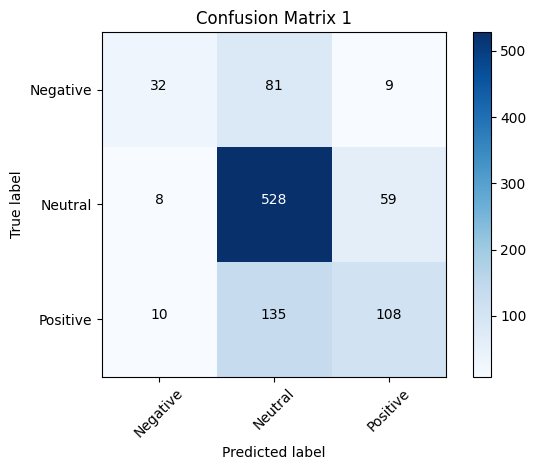

Accuracy in Testing Set is 0.688659793814433


In [263]:
target_names = [ 'Negative', 'Neutral','Positive']
acc1 = accuracy_score(ytest, best_predictions1)

cm = confusion_matrix(ytest, best_predictions1)
plt.figure()
plt.grid(visible=None)
plot_confusion_matrix(cm, classes=target_names, normalize=False, title="Confusion Matrix 1")
plt.show()
print("Accuracy in Testing Set is", acc1)

C:\Users\jlira\AppData\Local\Temp\ipykernel_32144\408001416.py:31: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)  ## added


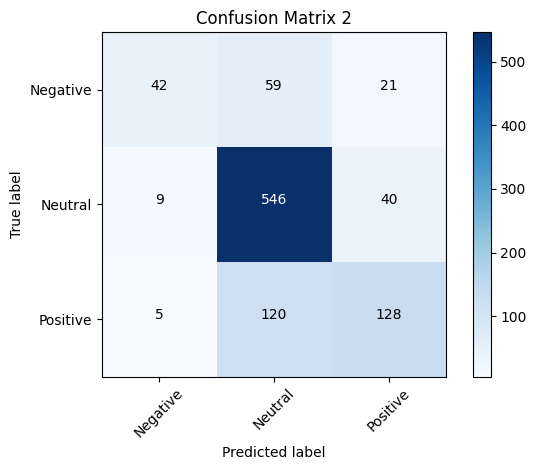

Accuracy in Testing Set is 0.7381443298969073


In [264]:
target_names = [ 'Negative', 'Neutral','Positive']
acc2 = accuracy_score(ytest, best_predictions2)
cm = confusion_matrix(ytest, best_predictions2)
plt.figure()
plt.grid(visible=None)
plot_confusion_matrix(cm, classes=target_names, normalize=False, title="Confusion Matrix 2")
plt.show()
print("Accuracy in Testing Set is", acc2)

C:\Users\jlira\AppData\Local\Temp\ipykernel_32144\408001416.py:31: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)  ## added


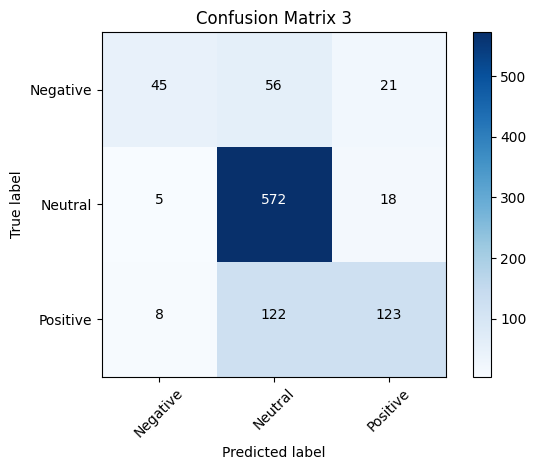

Accuracy in Testing Set is 0.7628865979381443


In [265]:
target_names = [ 'Negative', 'Neutral','Positive']
acc3 = accuracy_score(ytest, best_predictions3)
cm = confusion_matrix(ytest, best_predictions3)
plt.figure()
plt.grid(visible=None)
plot_confusion_matrix(cm, classes=target_names, normalize=False, title="Confusion Matrix 3")
plt.show()
print("Accuracy in Testing Set is", acc3)

C:\Users\jlira\AppData\Local\Temp\ipykernel_32144\408001416.py:31: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)  ## added


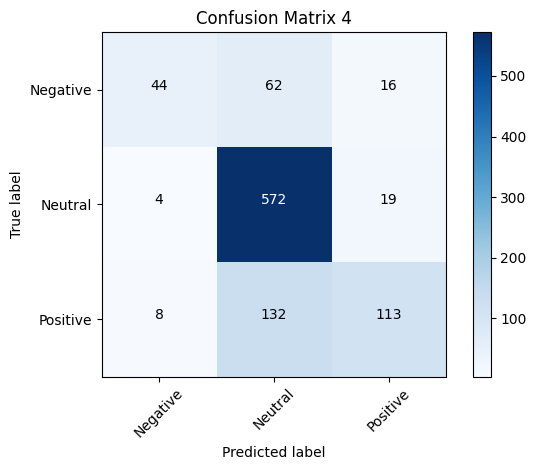

Accuracy in Testing Set is 0.7515463917525773


In [266]:
target_names = [ 'Negative', 'Neutral','Positive']
acc4 = accuracy_score(ytest, best_predictions4)
cm = confusion_matrix(ytest, best_predictions4)
plt.figure()
plt.grid(visible=None)
plot_confusion_matrix(cm, classes=target_names, normalize=False, title="Confusion Matrix 4")
plt.show()
print("Accuracy in Testing Set is", acc4)